In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.discrete.discrete_model import Probit
from statsmodels.graphics.mosaicplot import mosaic
from itertools import product
from termcolor import colored

# Preparación de los datos
#### Descripción de las caracteristicas ('features')
- Name: Nombre de la ventana de tiempo
- Netflows: Cantidad de Netflows en la ventana de tiempo
- First Protocol: Top 1 de los protocolos usados en la ventana de tiempo
- Second_Protocol: Top 2 de los  protocolos usados en la ventana de tiempo
- Third_Protocol: Top 3 de los  protocolos usados en la  ventana de tiempo
- P1_d: Percentil: 25% de todas las duraciones en la ventana de tiempo
- P2_d: Percentil:50% de todas las duraciones en la ventana de tiempo
- P3_d: Percentil:75% de todas las duraciones en la ventana de tiempo
- Duration: Duración total de la ventana de tiempo
- Max_d: Valor máximo de todas las duraciones en la ventana de tiempo
- Min_d: Valor mínimo de todas las duraciones en la ventana de tiempo
- Packets: Número total de paquetes en la ventana de tiempo
- Avg_bps: Promedio de bits por segundo en la ventana de tiempo
- Avg_pps: Promedio de paquetes por segundo en la ventana de tiempo
- Avg_bpp: Promedio de bytes por paquete en la ventana de tiempo
- Bytes: Número total de bytes en la ventana de tiempo
- Number_sp: Número total de puertos de origen usados en la ventana de tiempo
- Number_dp: Número total de puertos de destino usados en la ventana de tiempo
- First_sp: Top 1 de los puertos de origen en la ventana de tiempo
- Second_sp: Top 2 de los puertos de origen en la  ventana de tiempo
- Third_sp: Top 3 de los puertos de origen en la ventana de tiempo
- First_dp: Top 1 de los puertos de destino en la ventana de tiempo
- Second_dp: Top 2 de los puertos de destino en la ventana de tiempo
- Third_dp: Top 3 de los puertos de destino en la ventana de tiempo
- P1_ip: Percentil 25% de todas las entradas de paquetes en la ventana de tiempo
- P2_ip: Percentil 50% de todas las entradas de paquetes en la ventana de tiempo
- P3_ip: Percentil 75% de todas las entradas de paquetes en la ventana de tiempo
- P1_ib: Percentil 25% de todas las entradas de bytes en la ventana de tiempo
- P2_ib: Percentil 50% de todas las entradas de bytes en la ventana de tiempo
- P3_ib: Percentil 75% de todas las entradas de bytes en la ventana de tiempo
- Type: Tipo de ventana de tiempo (Minera/No minera)

In [22]:
print(colored(f'Cargamos los datos', attrs=['bold']))
data = pd.read_csv('./Data_C_B.csv')
data.head()

Cargamos los datos


Netflows First_Protocol       p1_d      p2_d       p3_d  duration    max_d  \
0         2            TCP  243.01100  243.0110  243.01100   486.022  243.011   
1         2            TCP  554.68125  554.6815  554.68175  1109.363  554.682   
2       119            TCP    0.66750  102.1360  112.38000  8193.891  202.635   
3         2            TCP  551.63250  551.6330  551.63350  1103.266  551.634   
4         4            TCP  169.33175  206.5110  243.68325   826.016  243.684   

     min_d  #packets  Avg_bps  ...  p3_ip   p1_ib    p2_ib    p3_ib      Type  \
0  243.011        34      438  ...  17.00  3578.0   6660.0   9742.0      mine   
1  554.681        36       66  ...  18.00  1497.0   2294.0   3091.0      mine   
2    0.000       711     1502  ...   6.00    45.0    128.0    224.0  not_mine   
3  551.632        61      318  ...  31.25  5964.5  10974.0  15983.5      mine   
4  169.310        75      536  ...  20.25   488.0   5692.5  12123.5      mine   

   Cryptocurrency  second_sp  second_dp  third_sp  third_dp  
0         Bitcoin      55821      55821       123       443  
1          Monero      14444      14444       123       443  
2   Does_not_have         80        443      5353        80  
3         Bitcash      49875      49875       123       443  
4         Bitcoin      52327      52327     52334     52334  

[5 rows x 29 columns]

In [23]:
data_discreta = (data.dtypes == 'int64')
data_categorica = (data.dtypes == 'object')
data_continua = (data.dtypes == 'float64')
data_discreta = [c for c in data_discreta.index if data_discreta[c]]
data_categorica = [c for c in data_categorica.index if data_categorica[c]]
data_continua = [c for c in data_continua.index if data_continua[c]]

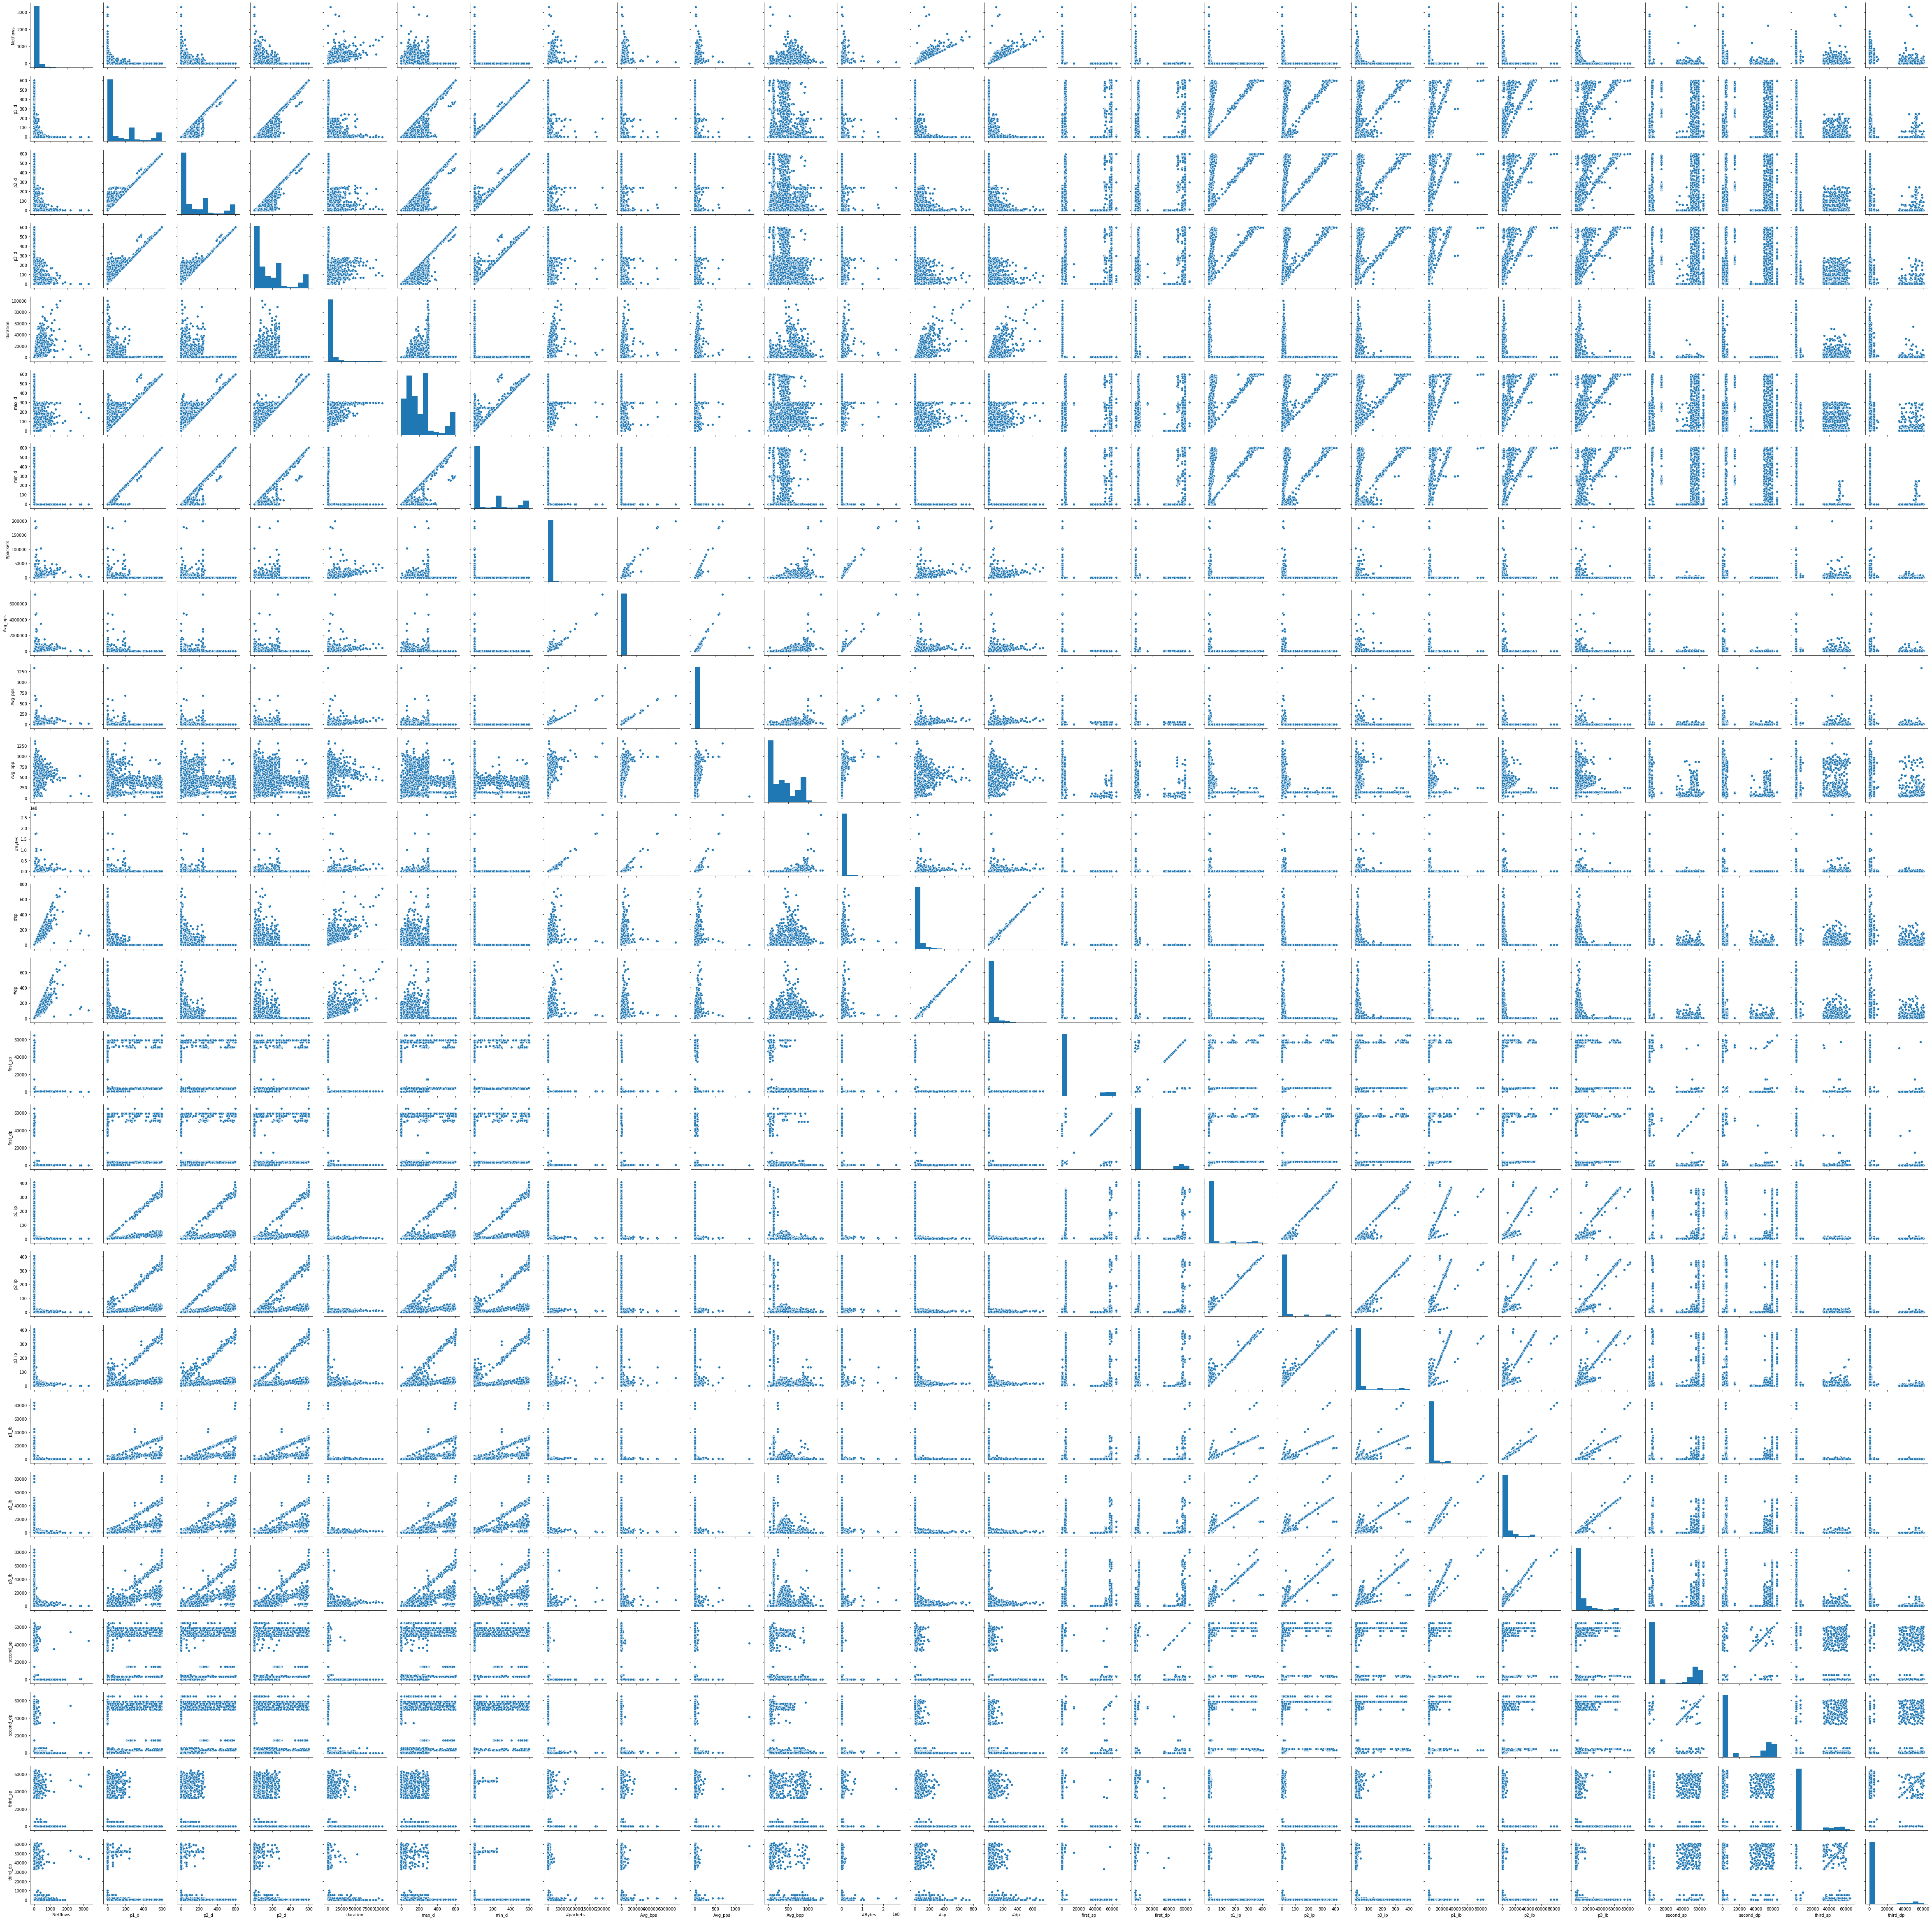

In [24]:
sns.pairplot(data)